<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importa paquetes necesarios
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.interpolate import lagrange

In [ ]:
#Lectura de datos
Datos = pd.read_csv('/content/Puebla_pos.csv')

#Vizualizacion de los datos
Datos.head()


,Unnamed: 0,FECHA_SINTOMAS,positivo
0,0,2020-03-02,1
1,1,2020-03-05,2
2,2,2020-03-08,3
3,3,2020-03-09,4
4,4,2020-03-10,3


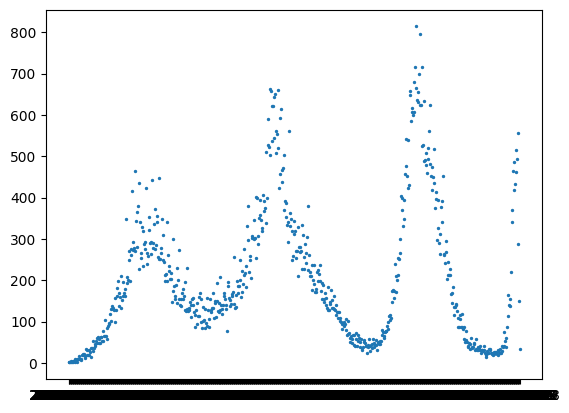

In [ ]:
#Graficar los datos. Eje horizontal representa las fechas; el eje vertical representa el número de infectados en dicha fecha.
plt.scatter(Datos['FECHA_SINTOMAS'], Datos['positivo'], s = 2)

In [ ]:
#Creación de columna con datos acumulados de los positivos.
Acumulado = Datos['positivo'].copy()

for i in range(1, len(Datos['positivo'])):
  Acumulado[i] = Acumulado[i-1] + Acumulado[i]

Datos['Positivos_acumulados'] = Acumulado

Datos

,Unnamed: 0,FECHA_SINTOMAS,positivo,Positivos_acumulados
0,0,2020-03-02,1,1
1,1,2020-03-05,2,3
2,2,2020-03-08,3,6
3,3,2020-03-09,4,10
4,4,2020-03-10,3,13
...,...,...,...,...
673,673,2022-01-09,493,139030
674,674,2022-01-10,556,139586
675,675,2022-01-11,287,139873
676,676,2022-01-12,149,140022


Notas para primera ola: Falta ordenar por semana y tomar la semana como tiempo.
Usar el codigo de regresión para solucionar el modelo primero con parámetros elegidos sin noción.
Ajustar los parámetros usando curve_fit/Minimize.

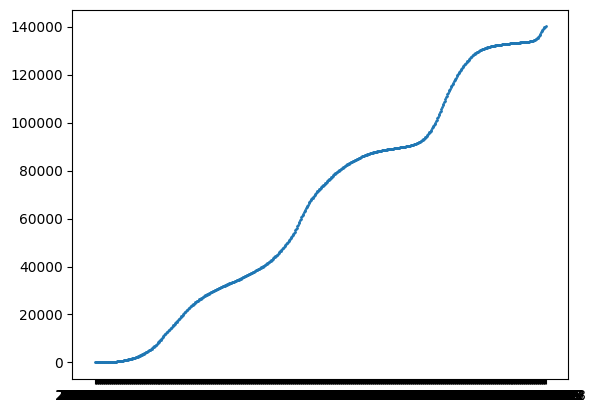

In [ ]:
#Graficar los datos. Eje horizontal representa las fechas; el eje vertical representa el número de infectados acumulados en dicha fecha.
plt.scatter(Datos['FECHA_SINTOMAS'], Datos['Positivos_acumulados'], s = 1)

In [ ]:
#Definición del modelo
def SIR(y,t,gamma,beta):
	S=y[0]
	I=y[1]
	R=y[2]

	N=S+I+R
	
	dS = -beta * S*I/N
	dI = beta * S*I/N - gamma*I
	#dR = gamma*I
	dA = beta * S*I/N

	return np.array([dS,dI,dR])

In [ ]:
N0=10000000.0
y0 = np.array([N0-1.,1.,0.])
y0

array([9.999999e+06, 1.000000e+00, 0.000000e+00])